In [3]:
from fyers_api import accessToken
from fyers_api.Websocket import ws
import pandas as pd
from fyers_api import accessToken
from fyers_api import fyersModel
import os
import math
import datetime
import csv
import numpy as np

In [4]:
client_id='TAZ287TZUA-100'
secret_id='PPZ5ZG1YAR'
url='https://www.google.com/'
response_type = "code"
grant_type = "authorization_code"

In [5]:
session=accessToken.SessionModel(
    client_id=client_id,
    secret_key=secret_id,
    redirect_uri=url, 
    response_type=response_type,
    grant_type=grant_type
)

response = session.generate_authcode()
print(response)

https://api.fyers.in/api/v2/generate-authcode?client_id=TAZ287TZUA-100&redirect_uri=https%3A%2F%2Fwww.google.com%2F&response_type=code&state=None


In [6]:
auth_code='eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJpc3MiOiJhcGkubG9naW4uZnllcnMuaW4iLCJpYXQiOjE2OTYwMDA5MTMsImV4cCI6MTY5NjAzMDkxMywibmJmIjoxNjk2MDAwMzEzLCJhdWQiOiJbXCJ4OjBcIiwgXCJ4OjFcIiwgXCJ4OjJcIiwgXCJkOjFcIiwgXCJkOjJcIiwgXCJ4OjFcIiwgXCJ4OjBcIl0iLCJzdWIiOiJhdXRoX2NvZGUiLCJkaXNwbGF5X25hbWUiOiJYTTA0MzQyIiwib21zIjoiSzEiLCJoc21fa2V5IjoiNWI3Mzg3ZTYxOGQzODllNGVjOGVmZjU1ODM0ZTBmMTA1NjdjYWU1ODk5YWQ5NWY3MzgxMTM3YTMiLCJub25jZSI6IiIsImFwcF9pZCI6IlRBWjI4N1RaVUEiLCJ1dWlkIjoiZmQ0ZWY2OWI0MDMyNGI0ZmIyZGI2OGRkNzJmNzFlNWUiLCJpcEFkZHIiOiIwLjAuMC4wIiwic2NvcGUiOiIifQ.wFfsR0TUQorRM0qCBOS_6W6F_Gz5ySzmioZf9zKo2vY'

In [7]:
session.set_token(auth_code)
response = session.generate_token()
print(response)

{'s': 'ok', 'code': 200, 'message': '', 'access_token': 'eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJpc3MiOiJhcGkuZnllcnMuaW4iLCJpYXQiOjE2OTYwMDA5NTIsImV4cCI6MTY5NjAzMzgzMiwibmJmIjoxNjk2MDAwOTUyLCJhdWQiOlsieDowIiwieDoxIiwieDoyIiwiZDoxIiwiZDoyIiwieDoxIiwieDowIl0sInN1YiI6ImFjY2Vzc190b2tlbiIsImF0X2hhc2giOiJnQUFBQUFCbEZ1dTREUEdST1lEMFI2OTJ1YjhTc3FDdktvN3BZOU9iNkFiTVl6N3M4R0NObHk0ejlmRlZqMW8xTV9SMDBGQ25Nb0RQRTkwNDJ5RFJZa1FkNXhrSTl3UkFqUjRka1RES2xydmI3bXpRenZQaFdaYz0iLCJkaXNwbGF5X25hbWUiOiJNT0hBTU1FRCBSQVlZQU4gU0FJVCIsIm9tcyI6IksxIiwiaHNtX2tleSI6IjViNzM4N2U2MThkMzg5ZTRlYzhlZmY1NTgzNGUwZjEwNTY3Y2FlNTg5OWFkOTVmNzM4MTEzN2EzIiwiZnlfaWQiOiJYTTA0MzQyIiwiYXBwVHlwZSI6MTAwLCJwb2FfZmxhZyI6Ik4ifQ.4U13Bmd5E7-NsJ5aWty2nMwNV4VFHMmvWXmKKsoErVI', 'refresh_token': 'eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJpc3MiOiJhcGkuZnllcnMuaW4iLCJpYXQiOjE2OTYwMDA5NTIsImV4cCI6MTY5NzI0MzQzMiwibmJmIjoxNjk2MDAwOTUyLCJhdWQiOlsieDowIiwieDoxIiwieDoyIiwiZDoxIiwiZDoyIiwieDoxIiwieDowIl0sInN1YiI6InJlZnJlc2hfdG9rZW4iLCJhdF9oYXNoIjoiZ0FBQU

In [8]:
access_token=response['access_token']

In [9]:
fyers=fyersModel.FyersModel(client_id=client_id,token=access_token,log_path=os.getcwd())

In [427]:
symbol="NSE:INFY-EQ"
data = {
    "symbol":symbol,
    "resolution":"5",
    "date_format":"1",
    "range_from":"2023-1-1",
    "range_to":"2023-3-30",
    "cont_flag":"1"
}

response = fyers.history(data=data)
print(response)

{'s': 'ok', 'candles': [[1672631100, 1514.0, 1514.75, 1508.25, 1508.6, 112529], [1672631400, 1508.6, 1511.8, 1506.2, 1511.5, 65484], [1672631700, 1511.5, 1511.95, 1506.5, 1507.85, 45997], [1672632000, 1507.9, 1508.25, 1504.05, 1507.35, 82389], [1672632300, 1506.9, 1509.45, 1506.0, 1509.4, 94813], [1672632600, 1509.35, 1512.0, 1508.35, 1511.9, 39435], [1672632900, 1511.55, 1515.0, 1510.5, 1515.0, 54468], [1672633200, 1515.0, 1515.6, 1514.2, 1514.95, 50094], [1672633500, 1514.95, 1515.0, 1512.4, 1512.4, 39567], [1672633800, 1512.4, 1514.0, 1512.25, 1514.0, 31803], [1672634100, 1514.0, 1517.0, 1513.55, 1516.65, 53762], [1672634400, 1516.65, 1517.0, 1514.0, 1515.2, 305568], [1672634700, 1515.0, 1515.6, 1512.7, 1513.0, 18236], [1672635000, 1513.8, 1514.85, 1513.25, 1514.1, 6184], [1672635300, 1514.1, 1514.1, 1512.0, 1512.05, 17479], [1672635600, 1512.5, 1513.45, 1510.0, 1510.0, 17480], [1672635900, 1510.0, 1511.0, 1509.0, 1510.55, 16748], [1672636200, 1510.95, 1511.6, 1509.8, 1509.8, 12472]

In [428]:
candleSticks=response['candles']


In [429]:
closingValues=[]
candleSticksForDF=[]
for item in candleSticks:
    candleSticksForDF.append(item)
    closingValues.append(item[4])

In [430]:
valuesToPlot={'closingValues':closingValues,'candleStick':candleSticksForDF}
df = pd.DataFrame(valuesToPlot)
df

,closingValues,candleStick
0,1508.60,"[1672631100, 1514.0, 1514.75, 1508.25, 1508.6,..."
1,1511.50,"[1672631400, 1508.6, 1511.8, 1506.2, 1511.5, 6..."
2,1507.85,"[1672631700, 1511.5, 1511.95, 1506.5, 1507.85,..."
3,1507.35,"[1672632000, 1507.9, 1508.25, 1504.05, 1507.35..."
4,1509.40,"[1672632300, 1506.9, 1509.45, 1506.0, 1509.4, ..."
...,...,...
4570,1381.20,"[1680082500, 1380.75, 1382.95, 1380.55, 1381.2..."
4571,1385.25,"[1680082800, 1381.1, 1386.55, 1380.95, 1385.25..."
4572,1385.40,"[1680083100, 1385.15, 1387.0, 1384.1, 1385.4, ..."
4573,1385.35,"[1680083400, 1385.2, 1386.5, 1384.2, 1385.35, ..."


In [431]:
small_lookback = 5
df['mean'] = df['closingValues'].ewm(span=5).mean()

In [432]:
import pandas as pd

# Assuming you have your price data in a DataFrame 'df' under the 'candleStick' column

# Define the window and standard deviation multiplier
window = 10  # You can adjust this window size as needed
std_dev_multiplier = 1.5  # Multiplier for standard deviation

# Calculate the rolling mean (SMA) and rolling standard deviation
df['SMA'] = df['candleStick'].apply(lambda x: pd.Series(x[4])).rolling(window=window).mean()
df['StdDev'] = df['candleStick'].apply(lambda x: pd.Series(x[4])).rolling(window=window).std()

# Calculate the upper and lower Bollinger Bands
df['Upper_Band'] = df['SMA'] + (std_dev_multiplier * df['StdDev'])
df['Lower_Band'] = df['SMA'] - (std_dev_multiplier * df['StdDev'])

# Print the resulting DataFrame 'df' with Bollinger Bands
print(df)


      closingValues                                        candleStick  \
0           1508.60  [1672631100, 1514.0, 1514.75, 1508.25, 1508.6,...   
1           1511.50  [1672631400, 1508.6, 1511.8, 1506.2, 1511.5, 6...   
2           1507.85  [1672631700, 1511.5, 1511.95, 1506.5, 1507.85,...   
3           1507.35  [1672632000, 1507.9, 1508.25, 1504.05, 1507.35...   
4           1509.40  [1672632300, 1506.9, 1509.45, 1506.0, 1509.4, ...   
...             ...                                                ...   
4570        1381.20  [1680082500, 1380.75, 1382.95, 1380.55, 1381.2...   
4571        1385.25  [1680082800, 1381.1, 1386.55, 1380.95, 1385.25...   
4572        1385.40  [1680083100, 1385.15, 1387.0, 1384.1, 1385.4, ...   
4573        1385.35  [1680083400, 1385.2, 1386.5, 1384.2, 1385.35, ...   
4574        1388.80  [1680083700, 1385.35, 1389.9, 1384.25, 1388.8,...   

             mean       SMA    StdDev   Upper_Band   Lower_Band  
0     1508.600000       NaN       NaN        

In [433]:
import pandas as pd
import numpy as np


def rsi_tradingview(ohlc: pd.DataFrame, period: int = 14, round_rsi: bool = True):
    """ Implements the RSI indicator as defined by TradingView on March 15, 2021.
        The TradingView code is as follows:
        //@version=4
        study(title="Relative Strength Index", shorttitle="RSI", format=format.price, precision=2, resolution="")
        len = input(14, minval=1, title="Length")
        src = input(close, "Source", type = input.source)
        up = rma(max(change(src), 0), len)
        down = rma(-min(change(src), 0), len)
        rsi = down == 0 ? 100 : up == 0 ? 0 : 100 - (100 / (1 + up / down))
        plot(rsi, "RSI", color=#8E1599)
        band1 = hline(70, "Upper Band", color=#C0C0C0)
        band0 = hline(30, "Lower Band", color=#C0C0C0)
        fill(band1, band0, color=#9915FF, transp=90, title="Background")

    :param ohlc:
    :param period:
    :param round_rsi:
    :return: an array with the RSI indicator values
    """

    delta = ohlc["closingValues"].diff()

    up = delta.copy()
    up[up < 0] = 0
    up = pd.Series.ewm(up, alpha=1/period).mean()

    down = delta.copy()
    down[down > 0] = 0
    down *= -1
    down = pd.Series.ewm(down, alpha=1/period).mean()

    rsi = np.where(up == 0, 0, np.where(down == 0, 100, 100 - (100 / (1 + up / down))))

    return np.round(rsi, 2) if round_rsi else rsi

In [434]:
import pandas as pd




def stoch_rsi_tradingview(ohlc: pd.DataFrame, period=14, smoothK=3, smoothD=3):
    """ Calculating Stochastic RSI (gives the same values as TradingView as of March 20, 2021.
        smoothK = input(3, "K", minval=1)
        smoothD = input(3, "D", minval=1)
        lengthRSI = input(14, "RSI Length", minval=1)
        lengthStoch = input(14, "Stochastic Length", minval=1)
        src = input(close, title="RSI Source")
        rsi1 = rsi(src, lengthRSI)
        k = sma(stoch(rsi1, rsi1, rsi1, lengthStoch), smoothK)
        d = sma(k, smoothD)

    :param ohlc:
    :param period:
    :param smoothK:
    :param smoothD:
    :return:
    """
    # Calculate RSI
    rsi = rsi_tradingview(ohlc, period=period, round_rsi=False)

    # Calculate StochRSI
    rsi = pd.Series(rsi)
    stochrsi  = (rsi - rsi.rolling(period).min()) / (rsi.rolling(period).max() - rsi.rolling(period).min())
    stochrsi_K = stochrsi.rolling(smoothK).mean()
    stochrsi_D = stochrsi_K.rolling(smoothD).mean()
    df['stochrsi_K']=round(stochrsi_K * 100, 2)
    df['stochrsi_D']=round(stochrsi_D * 100, 2)
    return round(rsi, 2), round(stochrsi_K * 100, 2), round(stochrsi_D * 100, 2)

In [435]:
stoch_rsi_tradingview(df)

(0          NaN
 1       100.00
 2        42.45
 3        39.13
 4        54.76
          ...  
 4570     69.12
 4571     76.43
 4572     76.65
 4573     76.40
 4574     81.10
 Length: 4575, dtype: float64,
 0         NaN
 1         NaN
 2         NaN
 3         NaN
 4         NaN
         ...  
 4570    67.51
 4571    83.82
 4572    92.63
 4573    99.67
 4574    99.67
 Length: 4575, dtype: float64,
 0         NaN
 1         NaN
 2         NaN
 3         NaN
 4         NaN
         ...  
 4570    53.43
 4571    68.65
 4572    81.32
 4573    92.04
 4574    97.32
 Length: 4575, dtype: float64)

In [436]:
counter=0
buyPrice=-420
stopLoss=-420
reward=3
buying=0
slCounter=0
tpCounter=0
eodCounter=0
stopLossCounterForDay=0
for index, row in df.iterrows():
    #Prints the number of times Stop loss is hit in a day
    if(str(datetime.datetime.fromtimestamp(df['candleStick'][index][0]).time())=='15:15:00'):
        print('StopLoss on '+str(datetime.datetime.fromtimestamp(df['candleStick'][index][0]))+' hit '+str(stopLossCounterForDay)+' times')
        stopLossCounterForDay=0
    #Sells everything if already bought a stock EOD
    if(buying==1):
        if(str(datetime.datetime.fromtimestamp(df['candleStick'][index][0]).time())=='15:15:00'):
            
            print(symbol+' EOD Exit at '+str(df['candleStick'][index][4]))
            eodCounter=eodCounter+((df['candleStick'][index][4]-buyPrice)/(buyPrice-stopLoss))
            counter=0
            buyPrice=-420
            stopLoss=-420
            reward=3
            buying=0
    if(stopLossCounterForDay<3):
        if not math.isnan(df['mean'][index] ):
            if not((df['mean'][index]<= df['candleStick'][index][2]) and (df['mean'][index]>= df['candleStick'][index][3])):
                #Checks for reference candles
                if(buying!=1):
                    if(df['mean'][index]>df['candleStick'][index][2] and df['Lower_Band'][index]>=df['candleStick'][index][3]):
                        print(symbol+' Reference Candle '+str(datetime.datetime.fromtimestamp(df['candleStick'][index][0])))
                        buyPrice=df['candleStick'][index][2]
                        stopLoss=df['candleStick'][index][3]-0.2
            else:
                if(buyPrice!=-420 and stopLoss!=-420):
                    #Buy Order
                    if(buying==0):
                        print(symbol+' Buy Triggered at '+str(buyPrice)+' '+str(datetime.datetime.fromtimestamp(df['candleStick'][index][0])))
                        buying=1
                    #stoploss hit    
                    if(df['candleStick'][index][3]<=stopLoss):
                        print(symbol+' SL hit at '+str(stopLoss)+' '+str(datetime.datetime.fromtimestamp(df['candleStick'][index][0])))
                        stopLossCounterForDay=stopLossCounterForDay+1
                        buying=0
                        buyPrice=-420
                        stopLoss=-420
                        slCounter=slCounter+1
                        continue
                    targetPrice=buyPrice+((buyPrice-stopLoss)*reward)
                    #Sells if made more then 1:3 and meets stochrsi indicator condition
                    if(df['candleStick'][index][2]>=targetPrice and df['stochrsi_K'][index]<=df['stochrsi_D'][index]):
                        
                        buying=0
                        print(symbol+' TP hit at '+str(df['candleStick'][index][2])+' '+str(datetime.datetime.fromtimestamp(df['candleStick'][index][0])))
                        #tpCounter=tpCounter+1
                        tpCounter=tpCounter+((df['candleStick'][index][4]-buyPrice)/(buyPrice-stopLoss))
                        buyPrice=-420
                        stopLoss=-420
      
print('TP:'+str(tpCounter))
print('SL:'+str(slCounter*-1))
roundValueForEOD=round(eodCounter,3)
print('EOD:'+str(roundValueForEOD))
roundValueForNet=round(((tpCounter)+(slCounter*-1)+(eodCounter)),3)
print('Net For Period='+ str(roundValueForNet))


NSE:INFY-EQ Reference Candle 2023-01-02 10:35:00
NSE:INFY-EQ Buy Triggered at 1511.0 2023-01-02 10:40:00
NSE:INFY-EQ TP hit at 1521.6 2023-01-02 12:45:00
NSE:INFY-EQ Reference Candle 2023-01-02 14:20:00
NSE:INFY-EQ Buy Triggered at 1519.5 2023-01-02 14:25:00
StopLoss on 2023-01-02 15:15:00 hit 0 times
NSE:INFY-EQ EOD Exit at 1524.0
NSE:INFY-EQ Reference Candle 2023-01-03 09:15:00
NSE:INFY-EQ Buy Triggered at 1521.15 2023-01-03 09:20:00
StopLoss on 2023-01-03 15:15:00 hit 0 times
NSE:INFY-EQ EOD Exit at 1519.4
NSE:INFY-EQ Reference Candle 2023-01-03 15:15:00
NSE:INFY-EQ Reference Candle 2023-01-03 15:20:00
NSE:INFY-EQ Buy Triggered at 1520.2 2023-01-04 09:15:00
NSE:INFY-EQ SL hit at 1518.85 2023-01-04 09:15:00
NSE:INFY-EQ Reference Candle 2023-01-04 09:20:00
NSE:INFY-EQ Reference Candle 2023-01-04 09:25:00
NSE:INFY-EQ Buy Triggered at 1515.95 2023-01-04 09:30:00
NSE:INFY-EQ SL hit at 1510.8 2023-01-04 09:40:00
NSE:INFY-EQ Reference Candle 2023-01-04 09:45:00
NSE:INFY-EQ Reference Candle

<Axes: >

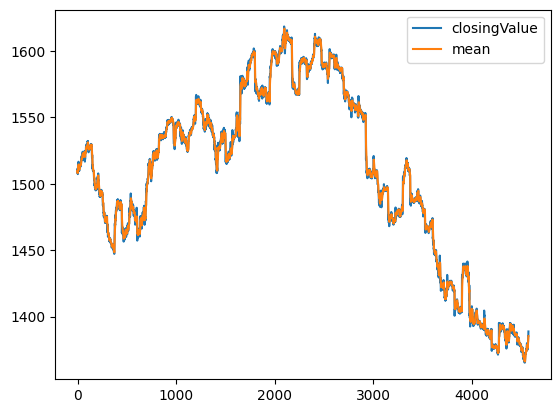

In [437]:
objForGraph={'closingValue':df['closingValues'],'mean':df['mean']}
dfToPlot = pd.DataFrame(objForGraph)
dfToPlot.plot()
